In [29]:
from alpaca.data.historical import StockHistoricalDataClient, OptionHistoricalDataClient
from alpaca.data.requests import StockBarsRequest, OptionBarsRequest
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
import pandas as pd
from datetime import datetime, timedelta
from zoneinfo import ZoneInfo

In [28]:
# Please change the following to your own PAPER api key and secret
# You can get them from https://alpaca.markets/

from dotenv import load_dotenv
import os

# keys is stored in config.env file
# - Specify the path to the config.env file
dotenv_path = os.path.join(os.getcwd(), "config.env")
# Load environment variables from the specified .env file
load_dotenv(dotenv_path)

api_key = os.getenv("ALPACA_API_KEY_PAPER")
secret_key = os.getenv('ALPACA_API_SECRET_KEY_PAPER')
base_url = os.getenv('ALPACA_BASE_URL')

#### We use paper environment for this example ####
paper = True # Please do not modify this. This example is for paper trading only.
####

# Below are the variables for development this documents
# Please do not change these variables
trade_api_url = None
trade_api_wss = None
data_api_url = None
option_stream_data_wss = None

In [30]:
# Initialize option historical data client
option_historical_data_client = OptionHistoricalDataClient(api_key, secret_key, url_override = data_api_url)

# Define the function to get SPY 0DTE options data
def get_aapl_call_option_data(symbol="AAPL", strike_price=150.0, expiration_date="2024-12-15"):
    # Convert expiration date to YYMMDD format
    expiration_date_formatted = datetime.strptime(expiration_date, "%Y-%m-%d").strftime("%y%m%d")
    
    # Convert strike price to cents and pad to 8 digits
    strike_price_formatted = f"{int(strike_price * 100):08d}"
    
    # Construct the option symbol
    option_symbol = f"{symbol}{expiration_date_formatted}C{strike_price_formatted}"
    
    # Define the current time and calculate the adjusted range
    now = datetime.now()
    end_date = now - timedelta(minutes=15)         # End date is 15 minutes before the current time
    start_date = end_date - timedelta(days=3)      # Start date is 3 days before the adjusted end date
    
    # Create an OptionBarsRequest for minute-level AAPL call options data
    request_params = OptionBarsRequest(
        symbol_or_symbols=[option_symbol],
        timeframe=TimeFrame(amount=1, unit=TimeFrameUnit.Minute),  # Specify minute-level data
        start=start_date,  # Start date: 3 days before the adjusted end date
        end=end_date       # End date: 15 minutes before now
    )
    
    # Fetch the option bars in a DataFrame
    try:
        bars = option_historical_data_client.get_option_bars(request_params)
        bars_df = bars.df
        if bars_df.empty:
            print(f"No data returned for symbol: {symbol}")
        return bars_df
    except Exception as e:
        print(f"An error occurred: {e}")
        return pd.DataFrame()

# Get data for the AAPL call option for the specified range
aapl_option_data = get_aapl_call_option_data(symbol="AAPL", strike_price=222.0, expiration_date="2024-11-01")

# Display the DataFrame
print(aapl_option_data)

No data returned for symbol: AAPL
Empty DataFrame
Columns: []
Index: []


Timestamps array shape: (762,)
Close prices array shape: (762,)


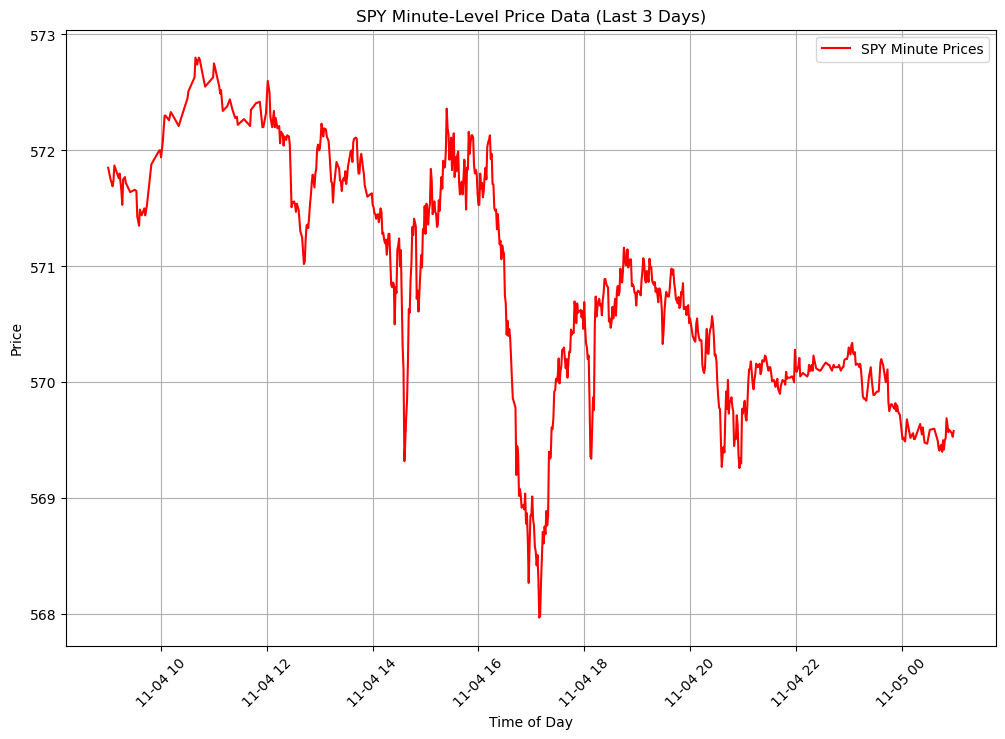

In [21]:
# Check if data is available before plotting
if not spy_data.empty and 'close' in spy_data.columns:
    # Reset the index to flatten the DataFrame and make timestamp a regular column
    spy_data = spy_data.reset_index()
    
    # Convert timestamp and close columns to numpy arrays
    timestamps = spy_data['timestamp'].to_numpy()
    close_prices = spy_data['close'].to_numpy()
    
    # Debug outputs to verify shapes and types
    print("Timestamps array shape:", timestamps.shape)
    print("Close prices array shape:", close_prices.shape)
    
    # Plotting the SPY price data over the specified range
    plt.figure(figsize=(12, 8))
    plt.plot(timestamps, close_prices, color='red', label='SPY Minute Prices')
    plt.title("SPY Minute-Level Price Data (Last 3 Days)")
    plt.xlabel("Time of Day")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)  # Rotate timestamps for better readability
    plt.show()
else:
    print("No data available to plot or 'close' column is missing.")